In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False # 解決負號顯示為方塊問題

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]

# 轉換成 Numpy Array
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [3]:
x = np.arange(-200, -100, 1) # bias
y = np.arange(-5, 5, 0.1) # weight
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
print('X:', X, X.shape, X.size)
print('Y:', Y, Y.shape, Y.size)

X: [[-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 ...
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]
 [-200 -199 -198 ... -103 -102 -101]] (100, 100) 10000
Y: [[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]] (100, 100) 10000


In [4]:
# bias 在 -200 到 -100 間； weight 在 -5 到 5 間，每個 x 和 y 的 Loss 
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid 吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

print('Z:', Z, Z.shape, Z.size)

Z: [[5192293.4        5188421.2        5184551.         ... 4826002.
  4822323.8        4818647.6       ]
 [5058614.888      5054792.888      5050972.888      ... 4697192.888
  4693564.888      4689938.888     ]
 [4926683.192      4922911.392      4919141.592      ... 4570130.592
  4566552.792      4562976.992     ]
 ...
 [ 358653.03199999  359650.23199999  360649.43199999 ...  464693.43199999
   465884.63199999  467077.83199999]
 [ 394415.67199999  395463.07199999  396512.47199999 ...  505325.47199999
   506566.87199999  507810.27199999]
 [ 431925.12799999  433022.72799999  434122.32799999 ...  547704.32799998
   548995.92799998  550289.52799998]] (100, 100) 10000


In [13]:
# 設定 b 和 w 初始值
b = -120
w = -4
lr = 0.0000001
iteration = 100000

b_history = [b]
w_history = [w]

for i in range(iteration):

    b_grad = 0.0
    w_grad = 0.0

    for n in range(len(x_data)):
        # 計算對 b 和 w 偏微分後的值
        b_grad = b_grad - 2.0*(y_data[n] - (b + w*x_data[n])) 
        w_grad = w_grad - 2.0*(y_data[n] - (b + w*x_data[n])) * x_data[n] # 對 w 做偏微分

    # 更新參數 b 和 w
    b = b - lr * b_grad
    w = w - lr * w_grad

    # 儲存每次更新後的 b 和 w
    b_history.append(b)
    w_history.append(w)

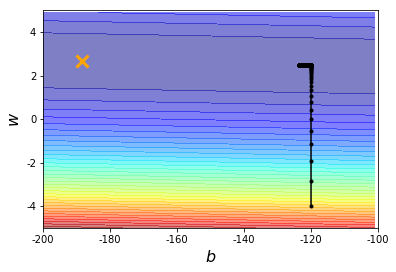

In [16]:
def show_gd_plot(b_spots, w_spots):
    # 將更新點們畫在 Loss Function 的等高線圖中(也就是上面計算的 Z)
    plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
    plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
    plt.plot(b_spots, w_spots, 'o-', ms=3, lw=1.5, color='black')
    plt.xlim(-200, -100)
    plt.ylim(-5, 5)
    plt.xlabel('$b$', fontsize=16)
    plt.ylabel('$w$', fontsize=16)
    plt.show()

show_gd_plot(b_history, w_history)

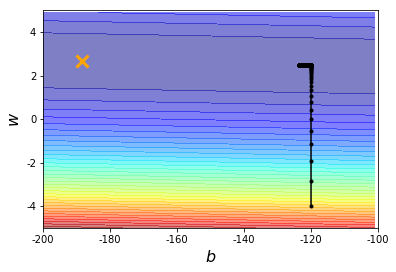

In [20]:
# 設定 b 和 w 初始值
b = -120
w = -4
lr = 0.0000001
iteration = 100000

# 包成 Function
def do_gradient_descent(b_init, w_init, l_rate, loop_times):
    b_update = b_init
    w_update = w_init
    b_spots_list = [b_init]
    w_spots_list = [w_init]

    for i in range(loop_times):

        b_grad = 0.0
        w_grad = 0.0

        for n in range(len(x_data)):
            # 計算對 b 和 w 偏微分後的值
            b_grad = b_grad - 2.0*(y_data[n] - (b_update + w_update*x_data[n])) 
            w_grad = w_grad - 2.0*(y_data[n] - (b_update + w_update*x_data[n])) * x_data[n] # 對 w 做偏微分

        # 更新參數 b 和 w
        b_update = b_update - l_rate * b_grad
        w_update = w_update - l_rate * w_grad

        # 儲存每次更新後的 b 和 w
        b_spots_list.append(b_update)
        w_spots_list.append(w_update)
    
    return b_spots_list, w_spots_list

b_history, w_history = do_gradient_descent(b, w, lr, iteration)
show_gd_plot(b_history, w_history)

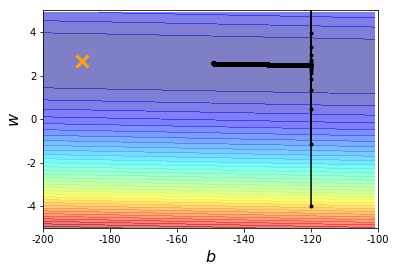

In [21]:
# 將 learning rate 調大 10 倍
lr = 0.000001
b_history, w_history = do_gradient_descent(b, w, lr, iteration)
show_gd_plot(b_history, w_history)

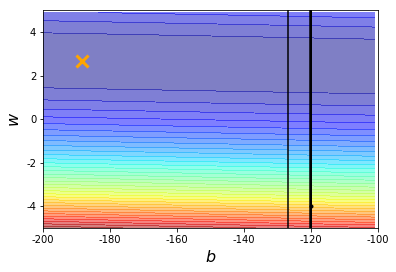

In [24]:
# 再把 learning rate 調大 10 倍
lr = 0.00001
b_history, w_history = do_gradient_descent(b, w, lr, iteration)
show_gd_plot(b_history, w_history)

In [26]:
b = -120
w = -4
lr = 1
iteration = 100000

# b 和 w 分別設置各自的 learning rate
b_lr = 0.0
w_lr = 0.0

# Store initial values for plotting.
b_history = [b]
w_history = [w]

# Iterations
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):        
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    b_lr = b_lr + b_grad**2
    w_lr = w_lr + w_grad**2
    
    # Update parameters.
    b = b - lr/np.sqrt(b_lr) * b_grad 
    w = w - lr/np.sqrt(w_lr) * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)

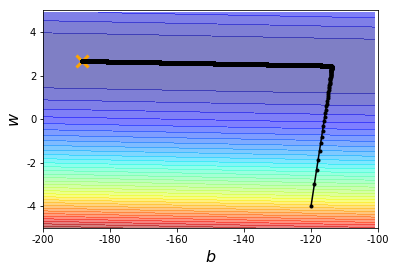

In [27]:
show_gd_plot(b_history, w_history)